In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.0/107.7 GB disk)



image 1/1 /content/drive/MyDrive/models/imgs/a (1).jpg: 640x640 3 0s, 2 1s, 2 2s, 1 3, 1 6, 1 9, 1 back, 2 nones, 208.1ms
Speed: 2.4ms preprocess, 208.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


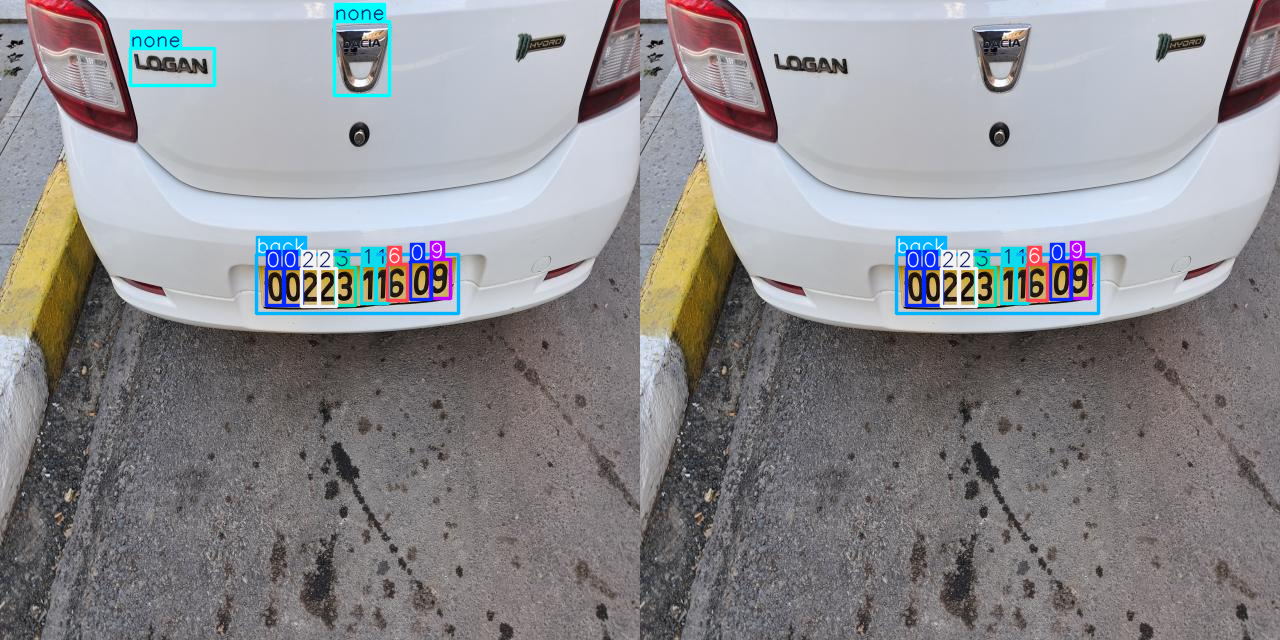

In [ ]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load model and run inference
model = YOLO('/content/drive/MyDrive/models/best_yolo11n_none.pt')
res = model('/content/drive/MyDrive/models/imgs/a (1).jpg', conf=0.3)[0]

# Image WITH "none"
img_with = res.plot(conf=False, font_size=5)

# Filter out "none" class
none_id = [k for k, v in model.names.items() if v.lower() == "none"]
if none_id:
    none_id = none_id[0]
    res.boxes = res.boxes[res.boxes.cls != none_id]

# Image WITHOUT "none"
img_without = res.plot(conf=False, font_size=7)

# Combine and show
combined = np.hstack((img_with, img_without))
cv2_imshow(combined)


In [ ]:
# Run inference again
res_all = model('/content/drive/MyDrive/models/imgs/a (1).jpg', conf=0.5)[0]

# Print each class with confidence
for box in res_all.boxes:
    cls_id = int(box.cls[0])
    conf = float(box.conf[0])
    class_name = model.names[cls_id]
    print(f"Class: {class_name}, Confidence: {conf:.2f}")



image 1/1 /content/drive/MyDrive/models/imgs/a (1).jpg: 640x640 3 0s, 1 1, 2 2s, 1 6, 1 9, 1 back, 1 none, 156.3ms
Speed: 2.1ms preprocess, 156.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Class: 2, Confidence: 0.94
Class: 2, Confidence: 0.94
Class: 6, Confidence: 0.92
Class: 0, Confidence: 0.88
Class: 0, Confidence: 0.87
Class: 0, Confidence: 0.86
Class: 1, Confidence: 0.72
Class: 9, Confidence: 0.68
Class: none, Confidence: 0.61
Class: back, Confidence: 0.56
